Given a binary tree, find the lowest common ancestor (LCA) of two given nodes in the tree.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”

Given the following binary tree:  root = [3,5,1,6,2,0,8,null,null,7,4]

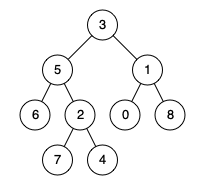

Example 1:

Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 1
Output: 3
Explanation: The LCA of nodes 5 and 1 is 3.
Example 2:

Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 4
Output: 5
Explanation: The LCA of nodes 5 and 4 is 5, since a node can be a descendant of itself according to the LCA definition.

# Resursive DFS approach - O(n) runtime, O(n) space

In [1]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution:
    
    def __init__(self):
        # Variable to store LCA node.
        self.ans = None

    
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        
        # Traverse the tree
        self.recurse_tree(root, p, q)
        return self.ans
        
    def recurse_tree(self, current_node: 'TreeNode', p: 'TreeNode', q: 'TreeNode')-> int:

        # If reached the end of a branch, return False.
        if not current_node:
            return False

        # Left Recursion
        left = self.recurse_tree(current_node.left, p, q)

        # Right Recursion
        right = self.recurse_tree(current_node.right, p, q)

        # If the current node is one of p or q
        mid = current_node == p or current_node == q

        # If any two of the three flags left, right or mid become True.
        if mid + left + right >= 2:
            self.ans = current_node

        # Return True if either of the three bool values is True.
        return mid or left or right

# BFS Iterative using parent pointers

In [2]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution:
    
    def __init__(self):
        # Variable to store LCA node.
        self.ans = None

    
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        
       # Stack for tree traversal
        stack = [root]

        # Dictionary for parent pointers
        parent = {root: None}

        # Iterate until we find both the nodes p and q
        while p not in parent or q not in parent:

            node = stack.pop()

            # While traversing the tree, keep saving the parent pointers.
            if node.left:
                parent[node.left] = node
                stack.append(node.left)
            if node.right:
                parent[node.right] = node
                stack.append(node.right)

        # Ancestors set() for node p.
        ancestors = set()

        # Process all ancestors for node p using parent pointers.
        while p:
            ancestors.add(p)
            p = parent[p]

        # The first ancestor of q which appears in
        # p's ancestor set() is their lowest common ancestor.
        while q not in ancestors:
            q = parent[q]
        return q

# BFS Iteraive without parent pointers - O(n) runtim, O(n) space

In [4]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution:
    
    # Three static flags to keep track of post-order traversal.

    # Both left and right traversal pending for a node.
    # Indicates the nodes children are yet to be traversed.
    BOTH_PENDING = 2
    # Left traversal done.
    LEFT_DONE = 1
    # Both left and right traversal done for a node.
    # Indicates the node can be popped off the stack.
    BOTH_DONE = 0

    
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        
       # Initialize the stack with the root node.
        stack = [(root, Solution.BOTH_PENDING)]

        # This flag is set when either one of p or q is found.
        one_node_found = False

        # This is used to keep track of LCA index.
        LCA_index = -1

        # We do a post order traversal of the binary tree using stack
        while stack:

            parent_node, parent_state = stack[-1]

            # If the parent_state is not equal to BOTH_DONE,
            # this means the parent_node can't be popped of yet.
            if parent_state != Solution.BOTH_DONE:

                # If both child traversals are pending
                if parent_state == Solution.BOTH_PENDING:

                    # Check if the current parent_node is either p or q.
                    if parent_node == p or parent_node == q:

                        # If one_node_found is set already, this means we have found both the nodes.
                        if one_node_found:
                            return stack[LCA_index][0]
                        else:
                            # Otherwise, set one_node_found to True,
                            # to mark one of p and q is found.
                            one_node_found = True

                            # Save the current top index of stack as the LCA_index.
                            LCA_index = len(stack) - 1

                    # If both pending, traverse the left child first
                    child_node = parent_node.left
                else:
                    # traverse right child
                    child_node = parent_node.right

                # Update the node state at the top of the stack
                # Since we have visited one more child.
                stack.pop()
                stack.append((parent_node, parent_state - 1))

                # Add the child node to the stack for traversal.
                if child_node:
                    stack.append((child_node, Solution.BOTH_PENDING))
            else:

                # If the parent_state of the node is both done,
                # the top node could be popped off the stack.

                # i.e. If LCA_index is equal to length of stack. Then we decrease LCA_index by 1.
                if one_node_found and LCA_index == len(stack) - 1:
                    LCA_index -= 1
                stack.pop()

        return None